In [1]:
from pywtt import minigraph as mg
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
%matplotlib widget


def get_steady_landscape(nx = 500, ny = 500, dx = 50, dy = 50,Kmin = 0.7e-4, Kmax = 1e-4, m = 0.3, n = 1, E = 1e-3, nit = 10 ):
    nx,ny = 500,500
    dx,dy = 50,50
    nxy = nx * ny
    xmin, ymin = 0,0

    Kmin = 0.7e-4
    Kmax = 1e-4
    m = 0.3
    n = 1
    E = 1e-3

    xx = np.arange(0,nx * dx, dx)
    yy = np.arange(0,ny * dy, dy)
    Xs, Ys = np.meshgrid(xx,yy)


    dummy = np.random.rand(ny,nx).astype(np.float32)
    dummy[[0,1],:] = 0


    landscape = mg(nx,ny,nxy,dx,dy, xmin, ymin, dummy.ravel())
    landscape.set_default_boundaries("periodic_EW")
    landscape.np2topo(dummy.ravel())


    FDth = np.linspace(0.2,2,nit)

    for i in range(nit):
        landscape.generate_random_landscape(Kmin, Kmax, m, n, E)
        tz = landscape.get_topo_np().reshape(ny,nx)
        fd = landscape.get_flow_distance_full().reshape(ny,nx)
        mask = fd>(FDth[i] * np.percentile(fd,80))
        tz = gaussian_filter(tz, sigma=2)
        tz[mask] = np.random.rand(ny,nx)[mask] + tz.max()+5
        landscape.np2topo(tz.ravel())
        landscape.set_boundaries_to(0)

    landscape.generate_random_landscape(Kmin, Kmax, m, n, E)
    tz = landscape.get_topo_np().reshape(ny,nx)
    tz = gaussian_filter(tz, sigma=1)
    return tz



nx,ny = 500,500
dx,dy = 50,50
nxy = nx * ny
xmin, ymin = 0,0

Kmin = 0.7e-4
Kmax = 1e-4
m = 0.3
n = 1
E = 1e-3

xx = np.arange(0,nx * dx, dx)
yy = np.arange(0,ny * dy, dy)
Xs, Ys = np.meshgrid(xx,yy)
print("Xs is ", Xs.shape)


dummy = np.random.rand(ny,nx).astype(np.float32)
dummy[[0,1],:] = 0

 
landscape = mg(nx,ny,nxy,dx,dy, xmin, ymin, dummy.ravel())
landscape.set_default_boundaries("periodic_EW")
landscape.np2topo(dummy.ravel())
Zs = []

Zs.append(landscape.get_topo_np().reshape(ny,nx))

# print("got the landscape: ", Zs)

# for i in range(1):
#     landscape.generate_random_landscape(1e-5, 2e-5, 0.45, 1.2, 1e-3)
#     tz = landscape.get_topo_np().reshape(ny,nx)
#     tz = gaussian_filter(tz, sigma=2)
#     # topomin = np.percentile(tz,70)
#     # mask = (tz>topomin)
#     # tz[mask] = topomin
#     # tz[mask] += np.random.rand(*tz.shape)[mask]
#     tz += np.random.rand(*tz.shape) * 10
#     # landscape.np2topo(tz.ravel())
    
#     landscape.refine_topo(1e5)
# Ath = 1e6

nit = 10
FDth = np.linspace(0.2,2,nit)

for i in range(nit):
    landscape.generate_random_landscape(Kmin, Kmax, m, n, E)
    tz = landscape.get_topo_np().reshape(ny,nx)
    Zs.append(tz.copy())
    # A = landscape.get_drainage_area().reshape(ny,nx)
    fd = landscape.get_flow_distance_full().reshape(ny,nx)
    # mask = (A<1e5)  & (fd>5e3)
    mask = fd>(FDth[i] * np.percentile(fd,80))
    # mask = np.logical_or(mask2,mask)
    tz = gaussian_filter(tz, sigma=2)
    Zs.append(tz)
    
    tz[mask] = np.random.rand(ny,nx)[mask] + tz.max()+5
    Zs.append(tz.copy())
    
    
    landscape.np2topo(tz.ravel())

    
    
# landscape.generate_random_landscape(1e-5, 2e-5, 0.45, 1.2, 1e-3)
    
# landscape.refine_topo(1e5)

# tz = landscape.invert_topography(1e7).reshape(ny,nx)
# Zs.append(tz)
landscape.generate_random_landscape(Kmin, Kmax, m, n, E)
tz = landscape.get_topo_np().reshape(ny,nx)
Zs.append(tz.copy())
tz = gaussian_filter(tz, sigma=1)
Zs.append(tz)

# Zs.append(landscape.get_debug_f().reshape(ny,nx))


# landscape.np2topo(tz.ravel())
# # landscape.refine_topo(1e5)
# Zs = landscape.get_topo_np()
print("got the landscape: ", [tt.shape for tt in Zs])

Xs is  (500, 500)
got the landscape:  [(500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500), (500, 500)]


In [2]:
from ipyfastscape import TopoViz3d
import xarray as xr
Zs = np.array(Zs)
ds = xr.Dataset()
ds["x"] = ('x',xx)
ds["y"] = ('y',yy)
ds["iterations"] = ('iterations',np.arange(len(Zs)))
stuff = xr.DataArray(Zs, dims = ('iterations', 'y','x'))
ds['topo'] = stuff

app = TopoViz3d(ds, canvas_height=600, time_dim="iterations", elevation_var = "topo" )

app.show()


Output(layout=Layout(height='640px'))

In [3]:
# faces = landscape.get_faces().reshape((ny-1) * (nx-1),4)

In [4]:
# faces

In [5]:
Zs = []
for nit in np.arange(50):
    print(nit,end = '\r')
    Zs.append(get_steady_landscape(nx = 500, ny = 500, dx = 50, dy = 50,Kmin = 0.7e-4, Kmax = 1e-4, m = 0.3, n = 1, E = 1e-3, nit = nit ))

from ipyfastscape import TopoViz3d
import xarray as xr
Zs = np.array(Zs)
ds = xr.Dataset()
ds["x"] = ('x',xx)
ds["y"] = ('y',yy)
ds["iterations"] = ('iterations',np.arange(len(Zs)))
stuff = xr.DataArray(Zs, dims = ('iterations', 'y','x'))
ds['topo'] = stuff

app = TopoViz3d(ds, canvas_height=600, time_dim="iterations", elevation_var = "topo" )

app.show()

Output(layout=Layout(height='640px'))

In [6]:
Zs

array([[[  4.0888734,   4.3167744,   4.731636 , ..., 309.06982  ,
         237.8639   , 126.10832  ],
        [ 21.132925 ,  22.337746 ,  24.013706 , ..., 586.7701   ,
         445.04782  , 237.31389  ],
        [ 64.30733  ,  70.546486 ,  76.58597  , ..., 672.9333   ,
         478.9634   , 258.74896  ],
        ...,
        [407.55893  , 355.41364  , 256.4623   , ..., 123.0093   ,
         152.02104  , 189.95543  ],
        [202.95589  , 177.56564  , 137.56566  , ...,  61.063984 ,
          74.42483  ,  85.685196 ],
        [ 60.43226  ,  54.832584 ,  50.38466  , ...,  28.820782 ,
          42.791145 ,  57.95842  ]],

       [[  4.8898416,   8.940809 ,  11.436225 , ...,  23.48915  ,
          21.383017 ,  19.728458 ],
        [ 12.3973255,  22.682613 ,  28.993877 , ...,  65.34761  ,
          52.67752  ,  42.281292 ],
        [ 23.659784 ,  43.40709  ,  55.577385 , ..., 127.06001  ,
          93.15933  ,  65.16467  ],
        ...,
        [ 37.9713   ,  43.63822  ,  54.397465 , ...,  

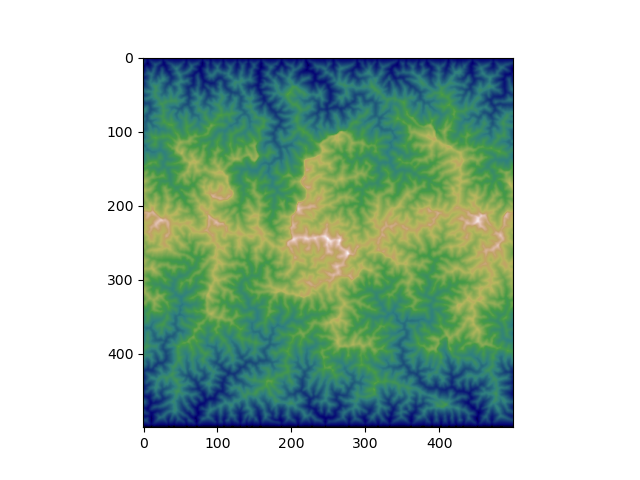

In [7]:
tz = get_steady_landscape(nit = 5)

fig,ax = plt.subplots()

ax.imshow(tz, cmap = "gist_earth")


In [8]:
# from pywtt import minigraph as mg
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.ndimage.filters import gaussian_filter


# %matplotlib widget

# nx,ny = 500,500
# dx,dy = 50,50
# nxy = nx * ny
# xmin, ymin = 0,0

# Kmin = 0.7e-4
# Kmax = 1e-4
# m = 0.3
# n = 1
# E = 1e-3

# xx = np.arange(0,nx * dx, dx)
# yy = np.arange(0,ny * dy, dy)
# Xs, Ys = np.meshgrid(xx,yy)
# print("Xs is ", Xs.shape)


# dummy = np.random.rand(ny,nx).astype(np.float32)
# dummy[[0,1],:] = 0

 
# landscape = mg(nx,ny,nxy,dx,dy, xmin, ymin, dummy.ravel())
# landscape.set_default_boundaries("periodic_EW")
# landscape.np2topo(dummy.ravel())
# Zs = []

# Zs.append(landscape.get_topo_np().reshape(ny,nx))

# # print("got the landscape: ", Zs)

# # for i in range(1):
# #     landscape.generate_random_landscape(1e-5, 2e-5, 0.45, 1.2, 1e-3)
# #     tz = landscape.get_topo_np().reshape(ny,nx)
# #     tz = gaussian_filter(tz, sigma=2)
# #     # topomin = np.percentile(tz,70)
# #     # mask = (tz>topomin)
# #     # tz[mask] = topomin
# #     # tz[mask] += np.random.rand(*tz.shape)[mask]
# #     tz += np.random.rand(*tz.shape) * 10
# #     # landscape.np2topo(tz.ravel())
    
# #     landscape.refine_topo(1e5)


# for i in range(15):
#     landscape.generate_random_landscape(Kmin, Kmax, m, n, E)
#     tz = landscape.get_topo_np().reshape(ny,nx)
#     Zs.append(tz.copy())
    
#     if(i<8):
#         topomin = np.percentile(tz,i*2.5 + 60)
#         mask = (tz>topomin)
#         tz[mask] = topomin
#         tz[mask] += np.random.rand(*tz.shape)[mask] * 50
#         # tz += np.random.rand(*tz.shape) * np.percentile(tz,20)
#         Zs.append(tz)
#         landscape.np2topo(tz.ravel())
    
#     if(i==0):
#         tz = gaussian_filter(tz, sigma=5)
#         Zs.append(tz)
#         landscape.np2topo(tz.ravel())
#     elif(i<5):
#         tz = gaussian_filter(tz, sigma=3)
#         Zs.append(tz)
#         landscape.np2topo(tz.ravel())



#     landscape.generate_random_landscape(Kmin, Kmax, m, n, E)
#     tz = landscape.get_topo_np().reshape(ny,nx)
#     Zs.append(tz)


#     landscape.refine_topo(1e5)
#     tz = landscape.get_topo_np().reshape(ny,nx)

#     Zs.append(tz)

    
    
# # landscape.generate_random_landscape(1e-5, 2e-5, 0.45, 1.2, 1e-3)
    
# # landscape.refine_topo(1e5)

# tz = landscape.invert_topography(1e7).reshape(ny,nx)
# Zs.append(tz)

# tz = landscape.get_topo_np().reshape(ny,nx)
# tz = gaussian_filter(tz, sigma=1)
# Zs.append(tz)



# # landscape.np2topo(tz.ravel())
# # # landscape.refine_topo(1e5)
# # Zs = landscape.get_topo_np()
# print("got the landscape: ", [tt.shape for tt in Zs])

In [9]:
# from pywtt import minigraph as mg
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.ndimage.filters import gaussian_filter


# %matplotlib widget

# nx,ny = 500,500
# dx,dy = 50,50
# nxy = nx * ny
# xmin, ymin = 0,0

# Kmin = 0.7e-4
# Kmax = 1e-4
# m = 0.3
# n = 1
# E = 1e-3

# xx = np.arange(0,nx * dx, dx)
# yy = np.arange(0,ny * dy, dy)
# Xs, Ys = np.meshgrid(xx,yy)
# print("Xs is ", Xs.shape)


# dummy = np.random.rand(ny,nx).astype(np.float32)
# dummy[[0,1],:] = 0

 
# landscape = mg(nx,ny,nxy,dx,dy, xmin, ymin, dummy.ravel())
# landscape.set_default_boundaries("periodic_EW")
# landscape.np2topo(dummy.ravel())
# Zs = []

# Zs.append(landscape.get_topo_np().reshape(ny,nx))

# # print("got the landscape: ", Zs)

# # for i in range(1):
# #     landscape.generate_random_landscape(1e-5, 2e-5, 0.45, 1.2, 1e-3)
# #     tz = landscape.get_topo_np().reshape(ny,nx)
# #     tz = gaussian_filter(tz, sigma=2)
# #     # topomin = np.percentile(tz,70)
# #     # mask = (tz>topomin)
# #     # tz[mask] = topomin
# #     # tz[mask] += np.random.rand(*tz.shape)[mask]
# #     tz += np.random.rand(*tz.shape) * 10
# #     # landscape.np2topo(tz.ravel())
    
# #     landscape.refine_topo(1e5)


# for i in range(15):
#     landscape.generate_random_landscape(Kmin, Kmax, m, n, E)
#     tz = landscape.get_topo_np().reshape(ny,nx)
#     Zs.append(tz.copy())
    
#     if(i<8):
#         topomin = np.percentile(tz,i*2.5 + 60)
#         mask = (tz>topomin)
#         tz[mask] = topomin
#         tz[mask] += np.random.rand(*tz.shape)[mask] * 50
#         # tz += np.random.rand(*tz.shape) * np.percentile(tz,20)
#         Zs.append(tz)
#         landscape.np2topo(tz.ravel())
    
#     if(i==0):
#         tz = gaussian_filter(tz, sigma=5)
#         Zs.append(tz)
#         landscape.np2topo(tz.ravel())
#     elif(i<5):
#         tz = gaussian_filter(tz, sigma=3)
#         Zs.append(tz)
#         landscape.np2topo(tz.ravel())



#     landscape.generate_random_landscape(Kmin, Kmax, m, n, E)
#     tz = landscape.get_topo_np().reshape(ny,nx)
#     Zs.append(tz)


#     landscape.refine_topo(1e5)
#     tz = landscape.get_topo_np().reshape(ny,nx)

#     Zs.append(tz)

    
    
# # landscape.generate_random_landscape(1e-5, 2e-5, 0.45, 1.2, 1e-3)
    
# # landscape.refine_topo(1e5)

# tz = landscape.invert_topography(1e7).reshape(ny,nx)
# Zs.append(tz)

# tz = landscape.get_topo_np().reshape(ny,nx)
# tz = gaussian_filter(tz, sigma=1)
# Zs.append(tz)



# # landscape.np2topo(tz.ravel())
# # # landscape.refine_topo(1e5)
# # Zs = landscape.get_topo_np()
# print("got the landscape: ", [tt.shape for tt in Zs])